Данные:

- age - возраст
- workclass - "рабочий класс"
- fnlwgt - количество людей, которое данный человек представляет
- education - наименование уровня образования
- education-num - уровень образования в числах
- marital-status - семейное положение
- occupation - профессия
- relationship - отношения
- sex - пол
- capital-gain - иные доходы
- capital-loss - расходы
- hours-per-week - отработанные в неделю часы
- income - доход на данном месте работы

In [1]:
import pandas as pd # библиотека для работы с таблицами
import numpy as np #  быстрая библиотека для математики в Python
import matplotlib.pyplot as plt # библиотека для простой визуализации данных
%matplotlib inline
import seaborn as sns # библиотека для красивой визуализации данных
from sklearn.model_selection import train_test_split # функция чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression #  модель для классификации 
from sklearn.neighbors import KNeighborsClassifier # модель ближайших соседей
from sklearn.tree import DecisionTreeClassifier # модель дерево решений
from sklearn.ensemble import RandomForestClassifier # модель случайный лес
from sklearn.metrics import accuracy_score, precision_score, recall_score # вычислительные метрики

In [2]:
data = pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Проблема исследования: 
- Было бы круто зарабатывать больше 50К в месяц

Исследовательские вопросы: 
- Какие факторы влияют на уровень доходов и в какой степени? Влияет ли раса и пол на уровень доходов? Влияет ли СП на уровень доходов?

Гипотеза:
На доходы во многих странах влияют:
- возраст
- уровень образования
- иные доходы и расходы человека
- количество отработанных в неделю часов
- семейное положение
- профессия
- раса
- пол.

Генеральная совокупность: 
- Работоспособные люди
- Страна проживания: не имеет значения

Наша выборка: 
- 32.6К работоспособных людей от 17 до 90 лет со всего мира

Text(0.5, 1.0, 'Распределение полов')

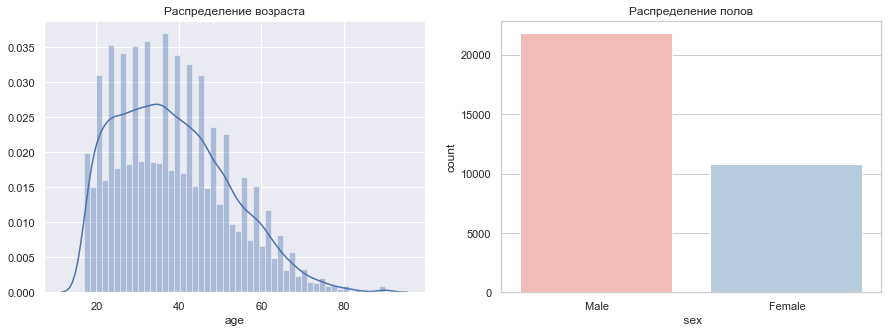

In [3]:
sns.set()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.set_style("whitegrid")
sns.distplot(data.age)
plt.title('Распределение возраста')

plt.subplot(1, 2, 2)
sns.countplot(x=' sex',palette='Pastel1', data=data)
plt.title('Распределение полов')

Сразу избавляемся от огромного количества **стран и "workclass"**, потому что наша гипотеза не предполагает их влияния на доходы и они для нас не имеют значения, **отношений**, так как они совпадают с семейным положением (выбор зависел от интереса: мы хотим узнать, есть ли различие между человеком, который ни разу не был женат, от человека разведенного) и **наименования уровня образования**, так как число в 'education-num' обозначает то же самое.


Количественные признаки в таком случае: 
- возраст
- уровень образования в числах
- иные доходы
- расходы
- отработанные в неделю часы

Номинальные признаки:
- семейное положение
- профессия
- раса
- пол
- доход на данном месте работы


**Описательные статистики**

***Количественные признаки***

*Возраст*

In [4]:
print ('mode        ', data['age'].mode())
print(data['age'].describe())

mode         0    36
dtype: int64
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


*Уровень образования в числах*

In [5]:
print ('mode        ', data[' education-num'].mode())
print(data[' education-num'].describe())

mode         0    9
dtype: int64
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name:  education-num, dtype: float64


*Иные доходы*

In [6]:
print ('mode        ', data[' capital-gain'].mode())
print(data[' capital-gain'].describe())

mode         0    0
dtype: int64
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name:  capital-gain, dtype: float64


*Расходы*

In [7]:
print ('mode        ', data[' capital-loss'].mode())
print(data[' capital-loss'].describe())

mode         0    0
dtype: int64
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name:  capital-loss, dtype: float64


*Отработанные в неделю часы*

In [8]:
print ('mode        ', data[' hours-per-week'].mode())
print(data[' hours-per-week'].describe())

mode         0    40
dtype: int64
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name:  hours-per-week, dtype: float64


***Номинальные признаки***

*Семейное положение*

In [9]:
print(data[' marital-status'].describe(include='oblect'))

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name:  marital-status, dtype: object


*Профессия*

In [10]:
print(data[' occupation'].describe(include='oblect'))

count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name:  occupation, dtype: object


*Раса*

In [11]:
print(data[' race'].describe(include='oblect'))

count      32561
unique         5
top        White
freq       27816
Name:  race, dtype: object


*Пол*

In [12]:
print(data[' sex'].describe(include='oblect'))

count     32561
unique        2
top        Male
freq      21790
Name:  sex, dtype: object


*Доход*

In [13]:
print(data[' income'].describe(include='oblect'))

count      32561
unique         2
top        <=50K
freq       24720
Name:  income, dtype: object


Избавляемся от номинальных признаков таким образом: во-первых, преобразовываем номинальные признаки в количественные с помощью get_dummies и словаря;...

In [14]:
data2=pd.get_dummies(data,columns=[' marital-status', ' occupation', ' race', ' income'])
sex_dict = {' Female':0, " Male":1}
data2[' sex'] = data2[' sex'].replace(to_replace = sex_dict)

In [15]:
data2.corr().style.format('{:.2}').background_gradient(cmap="coolwarm",axis=1)

С помощью круговой диаграммы посмотрим, в каком отношении люди разных профессий получают доходы более 50К.

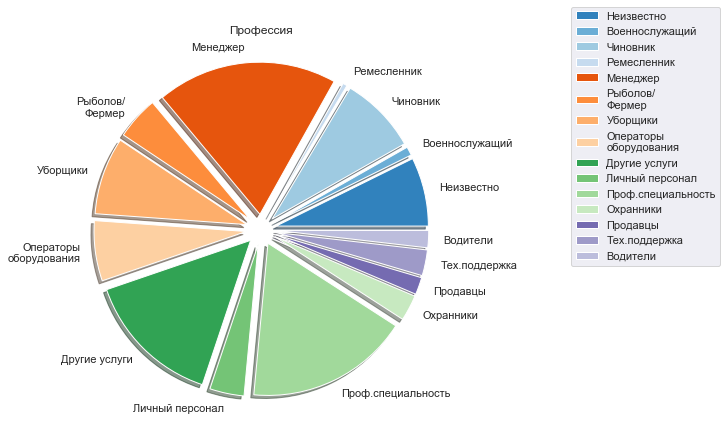

In [43]:
slices = [8,1,9,0.5,21,5,9,7,16,4,19,3,2,3,2]
plt.figure(figsize=(7, 7))

activities = ['Неизвестно', 'Военнослужащий','Чиновник', 'Ремесленник',
'Менеджер', 'Рыболов/\nФермер', 'Уборщики', 'Операторы\nоборудования', 'Другие услуги', 'Личный персонал', 
             'Проф.специальность', 'Охранники', 'Продавцы', 'Тех.поддержка', 'Водители']
explode= [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ]

plt.pie(slices, labels=activities, colors=plt.cm.tab20c.colors, explode=explode, shadow=True)

plt.title('Профессия')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1.1))
plt.show()

...во-вторых, создаем новую таблицу только с нужными нам данными, в которую не включаем страны, отношения и 'workclass'. Кроме того, в ходе изучения этой таблицы корреляции и круговой диаграммы мы замечаем, что корреляция доходов с разными видами профессий в большинстве своем мала, поэтому отбираем 3 наиболее коррелирующих вида.

In [16]:
target_column = [' income_ >50K']

In [17]:
nominal_columns = [' marital-status_ Divorced', ' marital-status_ Married-AF-spouse', ' marital-status_ Married-civ-spouse',
                   ' marital-status_ Married-spouse-absent', ' marital-status_ Never-married',
                   ' marital-status_ Separated', ' marital-status_ Widowed',
                  ' occupation_ Exec-managerial', ' occupation_ Other-service',' occupation_ Prof-specialty']

In [18]:
number_columns = [' education-num', 'age',' sex', ' capital-gain', ' hours-per-week']

In [19]:
data2 = data2[target_column + nominal_columns + number_columns]

In [20]:
data2.head()

,income_ >50K,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,education-num,age,sex,capital-gain,hours-per-week
0,0,0,0,0,0,1,0,0,0,0,0,13,39,1,2174,40
1,0,0,0,1,0,0,0,0,1,0,0,13,50,1,0,13
2,0,1,0,0,0,0,0,0,0,0,0,9,38,1,0,40
3,0,0,0,1,0,0,0,0,0,0,0,7,53,1,0,40
4,0,0,0,1,0,0,0,0,0,0,1,13,28,0,0,40


In [21]:
data2.corr()

,income_ >50K,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,education-num,age,sex,capital-gain,hours-per-week
income_ >50K,1.000000,-0.126995,0.012061,0.444696,-0.042532,-0.318440,-0.074386,-0.064381,0.214861,-0.156348,0.185866,0.335154,0.234037,0.215980,0.223329,0.229689
marital-status_ Divorced,-0.126995,1.000000,-0.010569,-0.366837,-0.045331,-0.277772,-0.071665,-0.070501,0.013312,0.015246,-0.006958,-0.007771,0.129975,-0.228621,-0.018798,0.026052
marital-status_ Married-AF-spouse,0.012061,-0.010569,1.000000,-0.024536,-0.003032,-0.018579,-0.004793,-0.004715,-0.006546,0.006411,0.000262,0.000964,-0.011896,-0.015704,-0.002322,0.001492
marital-status_ Married-civ-spouse,0.444696,-0.366837,-0.024536,1.000000,-0.105238,-0.644866,-0.166374,-0.163673,0.106978,-0.161925,0.041039,0.086078,0.315679,0.431805,0.085873,0.212817
marital-status_ Married-spouse-absent,-0.042532,-0.045331,-0.003032,-0.105238,1.000000,-0.079687,-0.020559,-0.020225,-0.017493,0.015107,-0.005034,-0.034223,0.016698,-0.038692,-0.006542,-0.007089
marital-status_ Never-married,-0.318440,-0.277772,-0.018579,-0.644866,-0.079687,1.000000,-0.125980,-0.123935,-0.105865,0.121444,-0.024406,-0.032109,-0.534359,-0.171434,-0.066334,-0.197936
marital-status_ Separated,-0.074386,-0.071665,-0.004793,-0.166374,-0.020559,-0.125980,1.000000,-0.031975,-0.018088,0.050316,-0.016539,-0.055152,0.010210,-0.109135,-0.013233,-0.016587
marital-status_ Widowed,-0.064381,-0.070501,-0.004715,-0.163673,-0.020225,-0.123935,-0.031975,1.000000,-0.016749,0.045314,-0.018366,-0.068044,0.265177,-0.188487,-0.012166,-0.107122
occupation_ Exec-managerial,0.214861,0.013312,-0.006546,0.106978,-0.017493,-0.105865,-0.018088,-0.016749,1.000000,-0.126749,-0.144172,0.200923,0.099352,0.036729,0.060618,0.139208
occupation_ Other-service,-0.156348,0.015246,0.006411,-0.161925,0.015107,0.121444,0.050316,0.045314,-0.126749,1.000000,-0.128064,-0.169684,-0.089346,-0.153677,-0.040271,-0.155872


По данным мы видим, что влияние семейного положения на доходы, составляющие более 50К, отличается.


Поэтому на основе корреляции семейного положения и целевой переменной сделаем круговую диаграмму, с помощью которой заметим, в каком отношении происходит это влияние.

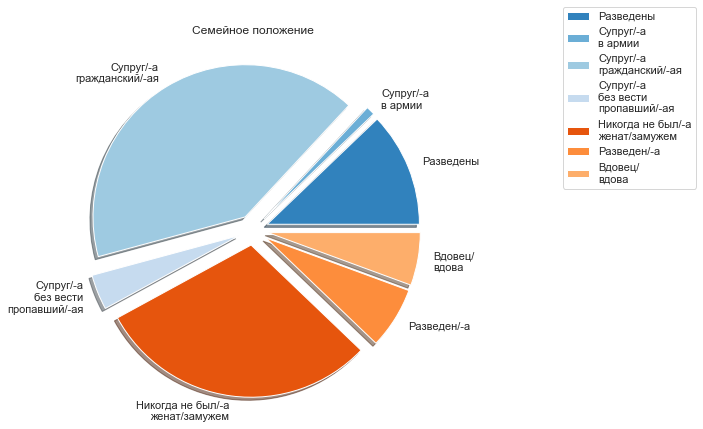

In [23]:
slices = [13,1,44,4,32,7,6]
plt.figure(figsize=(7, 7))

activities = ['Разведены', 'Супруг/-а\nв армии', 'Супруг/-а\nгражданский/-ая', 'Супруг/-а\nбез вести\nпропавший/-ая',
'Никогда не был/-а\nженат/замужем', 'Разведен/-а', 'Вдовец/\nвдова']
explode= [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ]

cols=['yellowgreen', 'lightgreen', 'lightpink', 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(slices, labels=activities, colors=plt.cm.tab20c.colors, explode=explode, shadow=True)

plt.title('Семейное положение')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1.1))
plt.show()

Видим, что количество женатых гражданских с доходами более 50К значительно превышают каждый из других показателей. На втором месте люди, которые ни разу не были в браке.

(а это просто красивая корреляционная таблица для постера.)

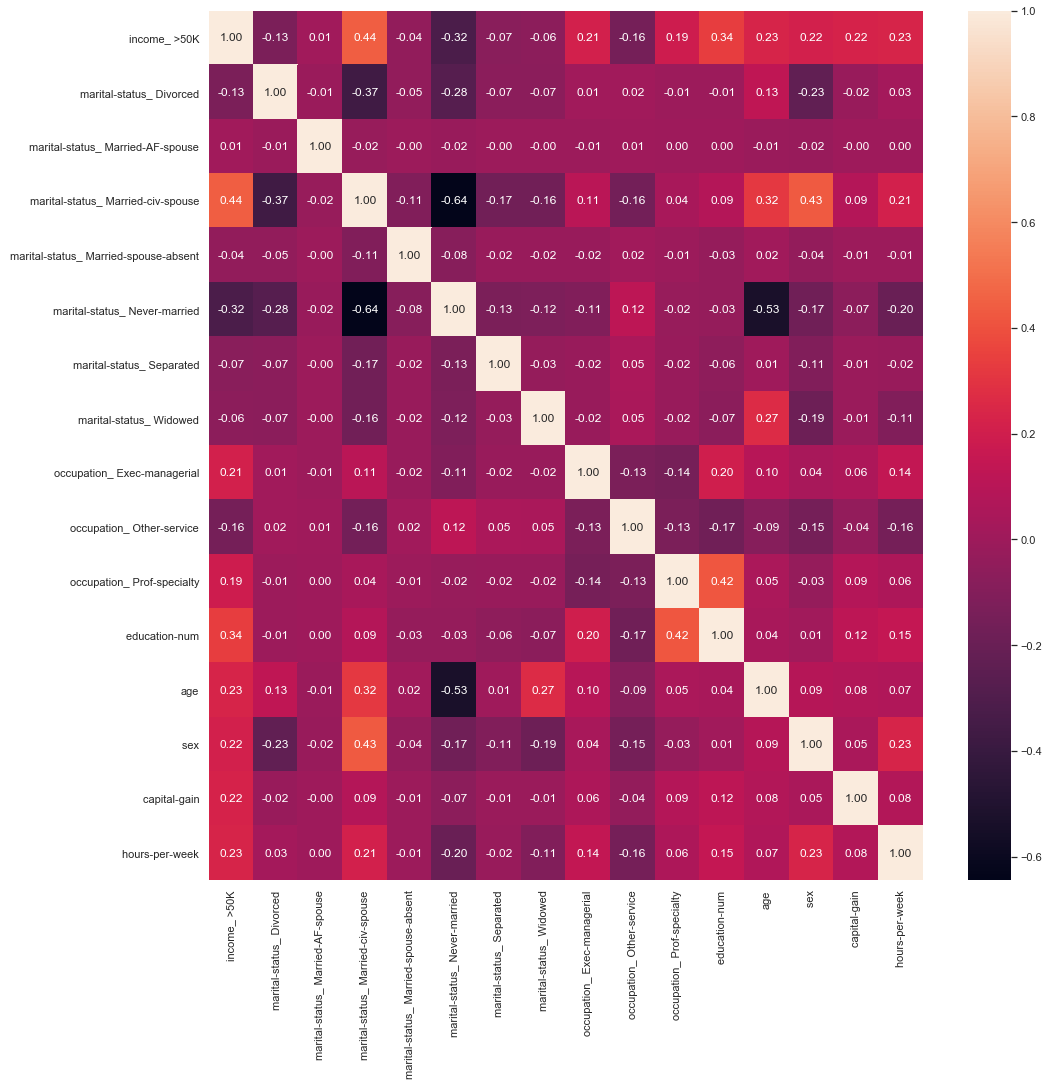

In [24]:
sns.set()

plt.figure(figsize=(16, 16))

sns.heatmap(data2.corr(), annot=True, fmt=".2f")
plt.show()

Далее изучаем таблицу корреляции, полученную в ходе объединения нужных нам данных.

In [25]:
data2.corr().style.format('{:.2}').background_gradient(cmap="coolwarm",axis=1)

,income_ >50K,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,education-num,age,sex,capital-gain,hours-per-week
income_ >50K,1.0,-0.13,0.012,0.44,-0.043,-0.32,-0.074,-0.064,0.21,-0.16,0.19,0.34,0.23,0.22,0.22,0.23
marital-status_ Divorced,-0.13,1.0,-0.011,-0.37,-0.045,-0.28,-0.072,-0.071,0.013,0.015,-0.007,-0.0078,0.13,-0.23,-0.019,0.026
marital-status_ Married-AF-spouse,0.012,-0.011,1.0,-0.025,-0.003,-0.019,-0.0048,-0.0047,-0.0065,0.0064,0.00026,0.00096,-0.012,-0.016,-0.0023,0.0015
marital-status_ Married-civ-spouse,0.44,-0.37,-0.025,1.0,-0.11,-0.64,-0.17,-0.16,0.11,-0.16,0.041,0.086,0.32,0.43,0.086,0.21
marital-status_ Married-spouse-absent,-0.043,-0.045,-0.003,-0.11,1.0,-0.08,-0.021,-0.02,-0.017,0.015,-0.005,-0.034,0.017,-0.039,-0.0065,-0.0071
marital-status_ Never-married,-0.32,-0.28,-0.019,-0.64,-0.08,1.0,-0.13,-0.12,-0.11,0.12,-0.024,-0.032,-0.53,-0.17,-0.066,-0.2
marital-status_ Separated,-0.074,-0.072,-0.0048,-0.17,-0.021,-0.13,1.0,-0.032,-0.018,0.05,-0.017,-0.055,0.01,-0.11,-0.013,-0.017
marital-status_ Widowed,-0.064,-0.071,-0.0047,-0.16,-0.02,-0.12,-0.032,1.0,-0.017,0.045,-0.018,-0.068,0.27,-0.19,-0.012,-0.11
occupation_ Exec-managerial,0.21,0.013,-0.0065,0.11,-0.017,-0.11,-0.018,-0.017,1.0,-0.13,-0.14,0.2,0.099,0.037,0.061,0.14
occupation_ Other-service,-0.16,0.015,0.0064,-0.16,0.015,0.12,0.05,0.045,-0.13,1.0,-0.13,-0.17,-0.089,-0.15,-0.04,-0.16


Видим, что многие из наших данных по семейному положению очень слабо коррелируют с целевой переменной, поэтому удалим их.

In [26]:
data2.drop([' marital-status_ Married-AF-spouse', 
           ' marital-status_ Separated', ' marital-status_ Widowed',
         ' marital-status_ Divorced',
           ' marital-status_ Married-spouse-absent'],axis=1, inplace=True)

In [27]:
data2.corr().style.format('{:.2}').background_gradient(cmap="coolwarm",axis=1)

,income_ >50K,marital-status_ Married-civ-spouse,marital-status_ Never-married,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,education-num,age,sex,capital-gain,hours-per-week
income_ >50K,1.0,0.44,-0.32,0.21,-0.16,0.19,0.34,0.23,0.22,0.22,0.23
marital-status_ Married-civ-spouse,0.44,1.0,-0.64,0.11,-0.16,0.041,0.086,0.32,0.43,0.086,0.21
marital-status_ Never-married,-0.32,-0.64,1.0,-0.11,0.12,-0.024,-0.032,-0.53,-0.17,-0.066,-0.2
occupation_ Exec-managerial,0.21,0.11,-0.11,1.0,-0.13,-0.14,0.2,0.099,0.037,0.061,0.14
occupation_ Other-service,-0.16,-0.16,0.12,-0.13,1.0,-0.13,-0.17,-0.089,-0.15,-0.04,-0.16
occupation_ Prof-specialty,0.19,0.041,-0.024,-0.14,-0.13,1.0,0.42,0.054,-0.029,0.085,0.06
education-num,0.34,0.086,-0.032,0.2,-0.17,0.42,1.0,0.037,0.012,0.12,0.15
age,0.23,0.32,-0.53,0.099,-0.089,0.054,0.037,1.0,0.089,0.078,0.069
sex,0.22,0.43,-0.17,0.037,-0.15,-0.029,0.012,0.089,1.0,0.048,0.23
capital-gain,0.22,0.086,-0.066,0.061,-0.04,0.085,0.12,0.078,0.048,1.0,0.078


Значение "Never-married" относительно сильно коррелирует со значением 'Married-civ-spouse', значит мы его тоже удалим, чтобы избавиться от мультиколлинеарности.

In [28]:
data2.drop([' marital-status_ Never-married'],axis=1, inplace=True)

In [29]:
data2.corr().style.format('{:.2}').background_gradient(cmap="coolwarm",axis=1)

,income_ >50K,marital-status_ Married-civ-spouse,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,education-num,age,sex,capital-gain,hours-per-week
income_ >50K,1.0,0.44,0.21,-0.16,0.19,0.34,0.23,0.22,0.22,0.23
marital-status_ Married-civ-spouse,0.44,1.0,0.11,-0.16,0.041,0.086,0.32,0.43,0.086,0.21
occupation_ Exec-managerial,0.21,0.11,1.0,-0.13,-0.14,0.2,0.099,0.037,0.061,0.14
occupation_ Other-service,-0.16,-0.16,-0.13,1.0,-0.13,-0.17,-0.089,-0.15,-0.04,-0.16
occupation_ Prof-specialty,0.19,0.041,-0.14,-0.13,1.0,0.42,0.054,-0.029,0.085,0.06
education-num,0.34,0.086,0.2,-0.17,0.42,1.0,0.037,0.012,0.12,0.15
age,0.23,0.32,0.099,-0.089,0.054,0.037,1.0,0.089,0.078,0.069
sex,0.22,0.43,0.037,-0.15,-0.029,0.012,0.089,1.0,0.048,0.23
capital-gain,0.22,0.086,0.061,-0.04,0.085,0.12,0.078,0.048,1.0,0.078
hours-per-week,0.23,0.21,0.14,-0.16,0.06,0.15,0.069,0.23,0.078,1.0


Получилось что-то более менее адекватное.

Построим **модели классификации**

In [30]:
Y = data2[' income_ >50K'].values
X=data2.drop([' income_ >50K'], axis=1)
X.shape, Y.shape

((32561, 9), (32561,))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

**Logistic Regression**

In [32]:
model = LogisticRegression(max_iter = 1000, random_state = 42)
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
Y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))

Accuracy:  0.8444057733647251
Precision:  0.7193370165745856
Recall:  0.5626620570440796


**KNeighborsClassifier**

In [34]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [35]:
Y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))

Accuracy:  0.8366260620329614
Precision:  0.6925965665236051
Recall:  0.5579083837510804


**DecisionTreeClassifier**

In [36]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
Y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))

Accuracy:  0.8147200327566793
Precision:  0.6236506378802747
Recall:  0.5492653414001729


**RandomForestClassifier**

In [38]:
model = RandomForestClassifier(max_depth=4, random_state=123)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [39]:
Y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))

Accuracy:  0.8461459719520934
Precision:  0.7821851078636047
Recall:  0.4857389801210026


Наиболее точными моделями вышли Логистическая регрессия и Случайный лес. Случайный лес был круче, пока не дошло до recall...

Вывод: точность моделей оставляет желать лучшего, однако все не так уж и плохо. Значит, что по нашим отобранным данным можно с более чем 80% точностью указать, кто чаще всего зарабатывает более 50К у.е. Можно даже составить рейтинг того, что больше влияет на доходы:
- 1) Брак (нужно быть гражданским)
- 2) Уровень образования
- 3) Возраст и количество отработанных в неделю часов (одинаково)
- 4) Пол и иные доходы (одинаково)
- 5) Профессия менеджера
- 6) Специальная профессия
- 7) Профессия, касающаяся других услуг.

Скорее всего, чтобы точность была выше, нужно исследовать и страны, однако если точность уже довольно высока, значит страны не так уж и сильно влияют на уровень дохода.

Сравнение результатов с гипотезами:

Влияют:
- возраст 
- уровень образования
- иные доходы 
- количество отработанных в неделю часов 
- семейное положение
- профессия 
- пол 

Очень слабо влияют:
- расходы человека - очень-очень слабо влияют
- раса - не влияет